<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Shrinkage_Methods/lab_06_6_ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Based on the statlearning lab and also from http://www.science.smith.edu/~jcrouser/SDS293/labs/

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# imports and setup
%matplotlib inline

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

In [3]:
hitters = pd.read_csv('https://raw.githubusercontent.com/mcnica89/ISL-python/master/datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

hitters = hitters.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]] # push salary at the end

hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 1]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 1]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 1]

X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

In [4]:
hitters.head

<bound method NDFrame.head of                    AtBat  Hits  HmRun  Runs  RBI  Walks  ...  Division  \
Player                                                   ...             
-Alan Ashby          315    81      7    24   38     39  ...         1   
-Alvin Davis         479   130     18    66   72     76  ...         1   
-Andre Dawson        496   141     20    65   78     37  ...         0   
-Andres Galarraga    321    87     10    39   42     30  ...         0   
-Alfredo Griffin     594   169      4    74   51     35  ...         1   
...                  ...   ...    ...   ...  ...    ...  ...       ...   
-Willie McGee        497   127      7    65   48     37  ...         0   
-Willie Randolph     492   136      5    76   50     94  ...         0   
-Wayne Tolleson      475   126      3    61   43     52  ...         1   
-Willie Upshaw       573   144      9    85   60     78  ...         0   
-Willie Wilson       631   170      9    77   44     31  ...         1   

       

# Ordinary Least Squares

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
#simple linear regressions
ols_model = LinearRegression()
ols_fit = ols_model.fit(X_train, y_train)
y_pred = ols_model.predict(X_test)

print(pd.Series(ols_fit.coef_, index=X.columns))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

AtBat                   -1.87657
Hits                     6.58951
HmRun                    0.25461
Runs                    -0.44574
RBI                      0.03890
Walks                    4.56284
Years                    6.14633
CAtBat                  -0.35637
CHits                    0.98968
CHmRun                   1.59033
CRuns                    0.76580
CRBI                     0.26737
CWalks                  -0.44545
League                  51.95733
Division              -116.57526
PutOuts                  0.28714
Assists                  0.14258
Errors                   1.65493
NewLeague               -3.25906
dtype: float64
RMSE: 365.50654310703135


# 6.6.1 Ridge Regression

## How do the coeffiencts change as a function of the regularization param?

In [7]:
grid = 10 ** np.linspace(3,-2,100)

ridge_model = Ridge()
coefs = []

for a in grid:
    ridge_model.set_params(alpha=a)
    ridge_model.fit(X, y)
    coefs.append(ridge_model.coef_)

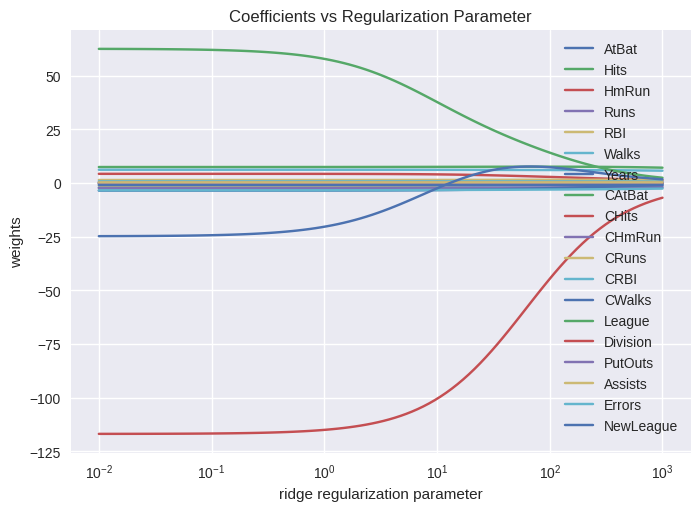

In [8]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')
ax.legend(X.columns)

plt.title("Coefficients vs Regularization Parameter")
plt.axis('tight')
plt.xlabel('ridge regularization parameter')
plt.ylabel('weights');

# Using Validation to find the "best" regularization parameter

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

grid = 10 ** np.linspace(3,-2,100)

ridge_model = Ridge()
coefs = []
test_RMSE = []


for a in grid:
    ridge_model.set_params(alpha=a)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

    preds = ridge_model.predict(X_test)

    test_RMSE.append( np.sqrt(np.mean( (preds - y_test)**2 ) ))

Best regularization value found:  5.994842503189409


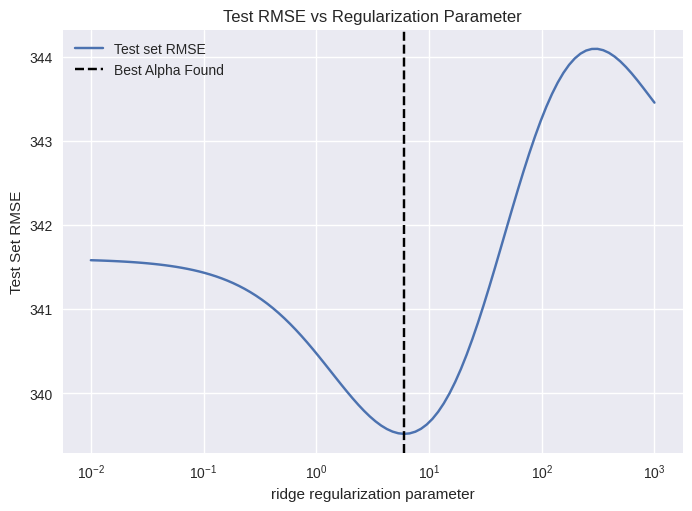

In [11]:
ax = plt.gca()
ax.plot(grid, test_RMSE,label="Test set RMSE")
best_alpha = grid[np.argmin(test_RMSE)]
ax.axvline(best_alpha,color='k',linestyle='--',label='Best Alpha Found')
ax.legend()
ax.set_xscale('log')
plt.title("Test RMSE vs Regularization Parameter")
plt.axis('tight')
plt.xlabel('ridge regularization parameter')
plt.ylabel('Test Set RMSE');

print("Best regularization value found: ", grid[np.argmin(test_RMSE)]  )

# How to trying different ridge params

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [13]:
# "good" ridge model
ridge2 = Ridge(alpha=1.0)
ridge2_fit = ridge2.fit(X_train, y_train)
y_pred2 = ridge2.predict(X_test)

print(pd.Series(ridge2_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred2))

AtBat                   -1.82667
Hits                     4.30819
HmRun                   -4.95295
Runs                    -0.10473
RBI                      4.05960
Walks                    3.48998
Years                    9.50302
CAtBat                  -0.60112
CHits                    2.15932
CHmRun                   2.94509
CRuns                    0.26848
CRBI                    -0.59103
CWalks                   0.17052
League                 104.24583
Division              -110.42267
PutOuts                  0.41879
Assists                  0.45344
Errors                  -5.79853
NewLeague              -54.07128
dtype: float64
MSE: 115924.20564557164


In [14]:
# very high lambda
ridge3 = Ridge(alpha=1e10)
ridge3_fit = ridge3.fit(X_train, y_train)
y_pred3 = ridge3.predict(X_test)

print(pd.Series(ridge3_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred3))

AtBat                    0.00036
Hits                     0.00013
HmRun                    0.00002
Runs                     0.00007
RBI                      0.00008
Walks                    0.00007
Years                    0.00001
CAtBat                   0.00688
CHits                    0.00210
CHmRun                   0.00029
CRuns                    0.00107
CRBI                     0.00119
CWalks                   0.00074
League                  -0.00000
Division                -0.00000
PutOuts                  0.00084
Assists                 -0.00000
Errors                   0.00000
NewLeague               -0.00000
dtype: float64
MSE: 165016.14024085485


In [15]:
# lambda=0 -> OLS
ridge4 = Ridge(alpha=0)
ridge4_fit = ridge4.fit(X_train, y_train)
y_pred4 = ridge4.predict(X_test)

print(pd.Series(ridge4_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred4))

AtBat                   -1.82111
Hits                     4.25916
HmRun                   -4.77340
Runs                    -0.03876
RBI                      3.98458
Walks                    3.47013
Years                    9.49824
CAtBat                  -0.60513
CHits                    2.17498
CHmRun                   2.97931
CRuns                    0.26636
CRBI                    -0.59846
CWalks                   0.17138
League                 133.74316
Division              -113.74387
PutOuts                  0.42106
Assists                  0.46438
Errors                  -6.02458
NewLeague              -81.92776
dtype: float64
MSE: 116690.46856662029


# Automatically choosing the best parameter with RidgeCV

In [16]:
# cross validated ridge (10-fold)
# Automatically do 10 fold cross validation to choose the best ridge parameter
ridge_cv = RidgeCV(alphas=grid, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print("Best regularization param value found: ", ridge_cv.alpha_)

Best regularization param value found:  1000.0


In [17]:
# cv_lambda
ridge5 = Ridge(alpha=ridge_cv.alpha_)
ridge5_fit = ridge5.fit(X_train, y_train)
y_pred5 = ridge5.predict(X_test)

print(pd.Series(ridge5_fit.coef_, index=X.columns))
print('Best Ridge Value: ',ridge_cv.alpha_)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred5)))

AtBat                   -2.01814
Hits                     4.54385
HmRun                   -3.61177
Runs                    -0.46000
RBI                      4.53986
Walks                    3.16103
Years                    1.27652
CAtBat                  -0.55454
CHits                    1.96334
CHmRun                   2.40531
CRuns                    0.42660
CRBI                    -0.47956
CWalks                   0.19538
League                   1.32586
Division                -3.16052
PutOuts                  0.45131
Assists                  0.47631
Errors                  -3.39286
NewLeague                0.66755
dtype: float64
Best Ridge Value:  1000.0
RMSE: 343.45427078877657


# Normalizing the dataset

In [18]:
def my_normalize_func(df):
  #returns the standardized version of a dataframe, as well as the list of means and stds (in case you need to un-normalize)
  means_series = df.mean()
  std_devs_series = df.std()
  normalized_df = (df-df.mean())/df.std()
  return normalized_df,means_series,std_devs_series

In [19]:
#Uncomment to run this!
#X_normalized,X_raw_means,X_raw_std_devs = my_normalize_func(X)
#print("X is now normalized!")
#print("-----Means----\n",X_raw_means)
#print("-----Std Devs----\n ",X_raw_std_devs)

In [20]:
#X = X_normalized